# Data Clean and Wrangling

Downdloaded data files from Github and imported as a batch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed
import seaborn as sns
from os import listdir
import re

In [2]:
filepaths = ['data/tennis_atp/match_00_19/'+f for f in listdir("data/tennis_atp/match_00_19") if f.endswith('.csv')]
df = pd.concat(map(pd.read_csv, filepaths), sort=False)

In [3]:
filepaths

['data/tennis_atp/match_00_19/atp_matches_2000.csv',
 'data/tennis_atp/match_00_19/atp_matches_2001.csv',
 'data/tennis_atp/match_00_19/atp_matches_2002.csv',
 'data/tennis_atp/match_00_19/atp_matches_2003.csv',
 'data/tennis_atp/match_00_19/atp_matches_2004.csv',
 'data/tennis_atp/match_00_19/atp_matches_2005.csv',
 'data/tennis_atp/match_00_19/atp_matches_2006.csv',
 'data/tennis_atp/match_00_19/atp_matches_2007.csv',
 'data/tennis_atp/match_00_19/atp_matches_2008.csv',
 'data/tennis_atp/match_00_19/atp_matches_2009.csv',
 'data/tennis_atp/match_00_19/atp_matches_2010.csv',
 'data/tennis_atp/match_00_19/atp_matches_2011.csv',
 'data/tennis_atp/match_00_19/atp_matches_2012.csv',
 'data/tennis_atp/match_00_19/atp_matches_2013.csv',
 'data/tennis_atp/match_00_19/atp_matches_2014.csv',
 'data/tennis_atp/match_00_19/atp_matches_2015.csv',
 'data/tennis_atp/match_00_19/atp_matches_2016.csv',
 'data/tennis_atp/match_00_19/atp_matches_2017.csv',
 'data/tennis_atp/match_00_19/atp_matches_2018

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61560 entries, 0 to 2780
Data columns (total 49 columns):
tourney_id            61560 non-null object
tourney_name          61560 non-null object
surface               61442 non-null object
draw_size             2781 non-null float64
tourney_level         61560 non-null object
tourney_date          61560 non-null int64
match_num             61560 non-null int64
winner_id             61560 non-null int64
winner_seed           25567 non-null object
winner_entry          7346 non-null object
winner_name           61560 non-null object
winner_hand           61542 non-null object
winner_ht             56229 non-null float64
winner_ioc            61560 non-null object
winner_age            61545 non-null float64
loser_id              61560 non-null int64
loser_seed            13973 non-null object
loser_entry           12107 non-null object
loser_name            61560 non-null object
loser_hand            61514 non-null object
loser_ht       

In [5]:
df = df[df.score.str.contains('RET') == False]
print('1890 retired rows are removed')

1890 retired rows are removed


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59670 entries, 0 to 2780
Data columns (total 49 columns):
tourney_id            59670 non-null object
tourney_name          59670 non-null object
surface               59557 non-null object
draw_size             2722 non-null float64
tourney_level         59670 non-null object
tourney_date          59670 non-null int64
match_num             59670 non-null int64
winner_id             59670 non-null int64
winner_seed           24958 non-null object
winner_entry          7058 non-null object
winner_name           59670 non-null object
winner_hand           59653 non-null object
winner_ht             54523 non-null float64
winner_ioc            59670 non-null object
winner_age            59657 non-null float64
loser_id              59670 non-null int64
loser_seed            13458 non-null object
loser_entry           11886 non-null object
loser_name            59670 non-null object
loser_hand            59624 non-null object
loser_ht       

In [7]:
df.groupby('tourney_level').tourney_id.count()

tourney_level
A    32651
D     5890
F      286
G     9746
M    11097
Name: tourney_id, dtype: int64

In [8]:
Total_A_origin = df[df.tourney_level=='A'].tourney_id.count()
Total_D_origin = df[df.tourney_level=='D'].tourney_id.count()
Total_F_origin = df[df.tourney_level=='F'].tourney_id.count()
Total_G_origin = df[df.tourney_level=='G'].tourney_id.count()
Total_M_origin = df[df.tourney_level=='M'].tourney_id.count()
print('Total games of level A = ' + str(Total_A_origin))
print('Total games of level D = ' + str(Total_D_origin))
print('Total games of level F = ' + str(Total_F_origin))
print('Total games of level G = ' + str(Total_G_origin))
print('Total games of level M = ' + str(Total_M_origin))

Total games of level A = 32651
Total games of level D = 5890
Total games of level F = 286
Total games of level G = 9746
Total games of level M = 11097


In [9]:
# remove tourey_level F with 286 rows.  So small unkown data set will not impact overll analysis
df = df[df.tourney_level!='F']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59384 entries, 0 to 2780
Data columns (total 49 columns):
tourney_id            59384 non-null object
tourney_name          59384 non-null object
surface               59271 non-null object
draw_size             2707 non-null float64
tourney_level         59384 non-null object
tourney_date          59384 non-null int64
match_num             59384 non-null int64
winner_id             59384 non-null int64
winner_seed           24850 non-null object
winner_entry          7058 non-null object
winner_name           59384 non-null object
winner_hand           59367 non-null object
winner_ht             54258 non-null float64
winner_ioc            59384 non-null object
winner_age            59371 non-null float64
loser_id              59384 non-null int64
loser_seed            13350 non-null object
loser_entry           11886 non-null object
loser_name            59384 non-null object
loser_hand            59338 non-null object
loser_ht       

Remove columns will not be used for late analysis

In [11]:
print('Verify results')
df.groupby('tourney_level').tourney_id.count()

Verify results


tourney_level
A    32651
D     5890
G     9746
M    11097
Name: tourney_id, dtype: int64

In [12]:
# drop columns with low ratio of complete data entries
columns = ['draw_size','winner_seed','winner_entry','loser_seed','loser_entry']
df.drop(columns, inplace=True, axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59384 entries, 0 to 2780
Data columns (total 44 columns):
tourney_id            59384 non-null object
tourney_name          59384 non-null object
surface               59271 non-null object
tourney_level         59384 non-null object
tourney_date          59384 non-null int64
match_num             59384 non-null int64
winner_id             59384 non-null int64
winner_name           59384 non-null object
winner_hand           59367 non-null object
winner_ht             54258 non-null float64
winner_ioc            59384 non-null object
winner_age            59371 non-null float64
loser_id              59384 non-null int64
loser_name            59384 non-null object
loser_hand            59338 non-null object
loser_ht              51408 non-null float64
loser_ioc             59384 non-null object
loser_age             59353 non-null float64
score                 59384 non-null object
best_of               59384 non-null int64
round        

In [14]:
print('Remove numeric fields which are null.')
df = df[df.minutes.notnull()]
df=df[df['w_ace'].notnull()]
df=df[df['w_df'].notnull()]
df=df[df['w_svpt'].notnull()]
df=df[df['w_1stIn'].notnull()]
df=df[df['w_1stWon'].notnull()]
df=df[df['w_2ndWon'].notnull()]
df=df[df['w_SvGms'].notnull()]
df=df[df['w_bpSaved'].notnull()]
df=df[df['w_bpFaced'].notnull()]
df=df[df['l_ace'].notnull()]
df=df[df['l_df'].notnull()]
df=df[df['l_svpt'].notnull()]
df=df[df['l_1stIn'].notnull()]
df=df[df['l_1stWon'].notnull()]
df=df[df['l_2ndWon'].notnull()]
df=df[df['l_SvGms'].notnull()]
df=df[df['l_bpSaved'].notnull()]
df=df[df['l_bpFaced'].notnull()]

Remove numeric fields which are null.


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52504 entries, 0 to 2780
Data columns (total 44 columns):
tourney_id            52504 non-null object
tourney_name          52504 non-null object
surface               52504 non-null object
tourney_level         52504 non-null object
tourney_date          52504 non-null int64
match_num             52504 non-null int64
winner_id             52504 non-null int64
winner_name           52504 non-null object
winner_hand           52497 non-null object
winner_ht             49212 non-null float64
winner_ioc            52504 non-null object
winner_age            52502 non-null float64
loser_id              52504 non-null int64
loser_name            52504 non-null object
loser_hand            52476 non-null object
loser_ht              47439 non-null float64
loser_ioc             52504 non-null object
loser_age             52494 non-null float64
score                 52504 non-null object
best_of               52504 non-null int64
round        

In [16]:
print('Verify results')
df.groupby('tourney_level').tourney_id.count()

Verify results


tourney_level
A    31485
D      773
G     9479
M    10767
Name: tourney_id, dtype: int64

In [17]:
# After the above clean up, level D only has 139 complete data entry against total 6060 rows.  Leve D data donst have good data.  Remove D level
df = df[df.tourney_level!='D']

In [18]:
print('Verify results')
df.groupby('tourney_level').tourney_id.count()

Verify results


tourney_level
A    31485
G     9479
M    10767
Name: tourney_id, dtype: int64

In [19]:
Total_A_cln = df[df.tourney_level=='A'].tourney_id.count()
Total_G_cln = df[df.tourney_level=='G'].tourney_id.count()
Total_M_cln = df[df.tourney_level=='M'].tourney_id.count()

In [20]:
print ('Level A data quality % = '+ str(np.around(Total_A_cln / Total_A_origin, 2)))
print ('Level G data quality % = '+ str(np.around(Total_G_cln / Total_G_origin, 2)))
print ('Level M data quality % = '+ str(np.around(Total_M_cln / Total_M_origin, 2)))

Level A data quality % = 0.96
Level G data quality % = 0.97
Level M data quality % = 0.97


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51731 entries, 0 to 2593
Data columns (total 44 columns):
tourney_id            51731 non-null object
tourney_name          51731 non-null object
surface               51731 non-null object
tourney_level         51731 non-null object
tourney_date          51731 non-null int64
match_num             51731 non-null int64
winner_id             51731 non-null int64
winner_name           51731 non-null object
winner_hand           51731 non-null object
winner_ht             48855 non-null float64
winner_ioc            51731 non-null object
winner_age            51731 non-null float64
loser_id              51731 non-null int64
loser_name            51731 non-null object
loser_hand            51731 non-null object
loser_ht              47219 non-null float64
loser_ioc             51731 non-null object
loser_age             51731 non-null float64
score                 51731 non-null object
best_of               51731 non-null int64
round        

In [22]:
# calculate percentae of serve stats for winners
df['w_ace_pct'] = np.around(df.w_ace/df.w_svpt, 2)
df['w_df_pct'] = np.around(df.w_df/df.w_svpt, 2)
df['w_1stIn_pct'] = np.around(df.w_1stIn / df.w_svpt, 2)
df['w_2ndIn_pct'] = np.around(((df.w_svpt - df.w_1stIn) / df.w_svpt), 2)
df['w_1stWon_pct'] = np.around(df.w_1stWon / df.w_svpt, 2)
df['w_2ndWon_pct'] = np.around(df.w_2ndWon/df.w_svpt, 2)
# calculate total games won and loss
df['w_GmsWon'] = df.w_SvGms-(df.w_bpFaced - df.w_bpSaved) + (df.l_bpFaced - df.l_bpSaved)
df['w_GmsLoss'] = df.l_SvGms-(df.l_bpFaced - df.l_bpSaved) + (df.w_bpFaced - df.w_bpSaved)
# calculate percentae of serve stats for losers
df['l_ace_pct'] = np.around(df.l_ace/df.l_svpt, 2)
df['l_df_pct'] = np.around(df.l_df/df.l_svpt, 2)
df['l_1stIn_pct'] = np.around(df.l_1stIn / df.l_svpt, 2)
df['l_2ndIn_pct'] = np.around(((df.l_svpt - df.l_1stIn) / df.l_svpt), 2)
df['l_1stWon_pct'] = np.around(df.l_1stWon / df.l_svpt, 2)
df['l_2ndWon_pct'] = np.around(df.l_2ndWon/df.l_svpt, 2)

In [23]:
# still have data issue or need to understand data
df['w_svptWon_pct'] = np.around((df.w_ace + df.w_1stWon + df.w_2ndWon - df.w_df) / (df.w_svpt + df.w_ace), 2)
df['l_svptWon_pct'] = np.around((df.l_ace + df.l_1stWon + df.l_2ndWon - df.l_df) / (df.l_svpt + df.w_ace), 2)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51731 entries, 0 to 2593
Data columns (total 60 columns):
tourney_id            51731 non-null object
tourney_name          51731 non-null object
surface               51731 non-null object
tourney_level         51731 non-null object
tourney_date          51731 non-null int64
match_num             51731 non-null int64
winner_id             51731 non-null int64
winner_name           51731 non-null object
winner_hand           51731 non-null object
winner_ht             48855 non-null float64
winner_ioc            51731 non-null object
winner_age            51731 non-null float64
loser_id              51731 non-null int64
loser_name            51731 non-null object
loser_hand            51731 non-null object
loser_ht              47219 non-null float64
loser_ioc             51731 non-null object
loser_age             51731 non-null float64
score                 51731 non-null object
best_of               51731 non-null int64
round        

In [25]:
print( 'There are two calculation for loser records are null.  Export the eveption to csv file.')
df[df.l_ace_pct.isnull()].to_csv('data/match_exception1.csv')

There are two calculation for loser records are null.  Export the eveption to csv file.


In [26]:
print('These two exception is because no data captured for loaser.  Need to exclue them.')
df = df[df.l_ace_pct.notnull()]

These two exception is because no data captured for loaser.  Need to exclue them.


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51729 entries, 0 to 2593
Data columns (total 60 columns):
tourney_id            51729 non-null object
tourney_name          51729 non-null object
surface               51729 non-null object
tourney_level         51729 non-null object
tourney_date          51729 non-null int64
match_num             51729 non-null int64
winner_id             51729 non-null int64
winner_name           51729 non-null object
winner_hand           51729 non-null object
winner_ht             48853 non-null float64
winner_ioc            51729 non-null object
winner_age            51729 non-null float64
loser_id              51729 non-null int64
loser_name            51729 non-null object
loser_hand            51729 non-null object
loser_ht              47217 non-null float64
loser_ioc             51729 non-null object
loser_age             51729 non-null float64
score                 51729 non-null object
best_of               51729 non-null int64
round        

In [28]:
def plot_bar(data, width, xticks_list=' '):
    ind = np.arange(len(data))
    _=plt.bar(ind, df_winner_s, width=width)
    _=plt.xticks(ind, xticks_list)
    
    plt.show()

In [29]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y 

In [30]:
df.winner_hand.unique()

array(['R', 'L', 'U'], dtype=object)

In [31]:
df_winners = df[['winner_id', 'winner_rank','winner_name', 'winner_hand','winner_ht', 'winner_age','winner_ioc']].drop_duplicates()

In [32]:
df_winners.groupby('winner_hand').winner_id.count()

winner_hand
L     3588
R    24126
U       74
Name: winner_id, dtype: int64

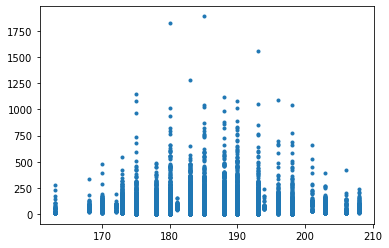

In [33]:
_=plt.scatter(x='winner_ht',y='winner_rank', data=df_winners,marker='.')
plt.show()

In [34]:
# how many games playeed at different court surface
df_winner_s = df.groupby('surface').winner_id.count()
df_winner_s

surface
Carpet     1363
Clay      17108
Grass      5678
Hard      27580
Name: winner_id, dtype: int64

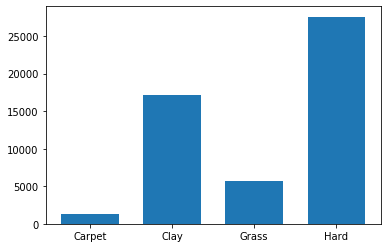

In [35]:
width=0.7
xticks_list=('Carpet','Clay','Grass','Hard','Unknown')
plot_bar(df_winner_s, width, xticks_list)

In [36]:
# exam round values
df.loc[:,'round'].unique()

array(['R32', 'R16', 'QF', 'SF', 'F', 'R128', 'R64', 'RR', 'BR'],
      dtype=object)

In [37]:
df[df['round']=='RR'].tourney_level.unique()

array(['A'], dtype=object)

In [38]:
df[df['round']=='BR'].tourney_level.unique()

array(['A'], dtype=object)

In [39]:
df.groupby('round').winner_id.count()

round
BR          1
F        1264
QF       4898
R128     5878
R16      9763
R32     18330
R64      8789
RR        351
SF       2455
Name: winner_id, dtype: int64

In [40]:
df[df.tourney_level=='A'].groupby('round').count()

,tourney_id,tourney_name,surface,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,...,w_GmsWon,w_GmsLoss,l_ace_pct,l_df_pct,l_1stIn_pct,l_2ndIn_pct,l_1stWon_pct,l_2ndWon_pct,w_svptWon_pct,l_svptWon_pct
round,,,,,,,,,,,,,,,,,,,,,
BR,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
F,1014,1014,1014,1014,1014,1014,1014,1014,1014,971,...,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014
QF,3921,3921,3921,3921,3921,3921,3921,3921,3921,3724,...,3921,3921,3921,3921,3921,3921,3921,3921,3921,3921
R16,7808,7808,7808,7808,7808,7808,7808,7808,7808,7347,...,7808,7808,7808,7808,7808,7808,7808,7808,7808,7808
R32,14431,14431,14431,14431,14431,14431,14431,14431,14431,13346,...,14431,14431,14431,14431,14431,14431,14431,14431,14431,14431
R64,1987,1987,1987,1987,1987,1987,1987,1987,1987,1879,...,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987
RR,351,351,351,351,351,351,351,351,351,351,...,351,351,351,351,351,351,351,351,351,351
SF,1970,1970,1970,1970,1970,1970,1970,1970,1970,1888,...,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970


In [41]:
print('Round code RR and BR are from level A - Other tourney level')

Round code RR and BR are from level A - Other tourney level


In [42]:
print('Added sequence number for each round')
df.loc[df['round']=='R128', 'round_num'] = 1
df.loc[df['round']=='R64', 'round_num'] = 2
df.loc[df['round']=='R32', 'round_num'] = 3
df.loc[df['round']=='R16', 'round_num'] = 4
df.loc[df['round']=='QF', 'round_num'] = 5
df.loc[df['round']=='SF', 'round_num'] = 6
df.loc[df['round']=='F', 'round_num'] = 7
print('Assigned temp value 11 and 10 for BR and RR.  Not quiet sure how RR and BR working in round sequence')
df.loc[df['round']=='RR', 'round_num'] = 10
df.loc[df['round']=='BR', 'round_num'] = 11

Added sequence number for each round
Assigned temp value 11 and 10 for BR and RR.  Not quiet sure how RR and BR working in round sequence


In [43]:
df[df.round_num.isnull()]

,tourney_id,tourney_name,surface,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,...,w_GmsLoss,l_ace_pct,l_df_pct,l_1stIn_pct,l_2ndIn_pct,l_1stWon_pct,l_2ndWon_pct,w_svptWon_pct,l_svptWon_pct,round_num


In [44]:
# Will focus on Tourney level G and M matches
df_GM = df.query('tourney_level in ["G","M"]')

In [45]:
print('create game time in minutes dataframe for level G and M')
df_GM_m = df_GM.loc[:,['tourney_id','tourney_level', 'winner_id','winner_name','round_num','minutes']]

create game time in minutes dataframe for level G and M


In [46]:
df_GM_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20246 entries, 155 to 2593
Data columns (total 6 columns):
tourney_id       20246 non-null object
tourney_level    20246 non-null object
winner_id        20246 non-null int64
winner_name      20246 non-null object
round_num        20246 non-null float64
minutes          20246 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB


In [47]:
print('get the total won games by player and tourney.  A player plays minimum 1 round or maximum 7 rounds which reaches to final')

df_ind = pd.DataFrame(df_GM_m.groupby(['tourney_id','winner_name']).round_num.max())

get the total won games by player and tourney.  A player plays minimum 1 round or maximum 7 rounds which reaches to final


In [48]:
# exclud finals and the only games to get the index for the last won game 
df_ind = df_ind.query('round_num > 1 & round_num < 7')

In [49]:
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7426 entries, (2000-352, Albert Costa) to (2019-M024, Yoshihito Nishioka)
Data columns (total 1 columns):
round_num    7426 non-null float64
dtypes: float64(1)
memory usage: 93.9+ KB


In [50]:
print('Merge two data frames to get the game time in minutes for the last won game')
df_GM_m_lastWonGm = pd.merge(df_GM_m, df_ind, on = ['tourney_id','winner_name','round_num'])

Merge two data frames to get the game time in minutes for the last won game


In [51]:
df_GM_m_lastWonGm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7426 entries, 0 to 7425
Data columns (total 6 columns):
tourney_id       7426 non-null object
tourney_level    7426 non-null object
winner_id        7426 non-null int64
winner_name      7426 non-null object
round_num        7426 non-null float64
minutes          7426 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 406.1+ KB


In [52]:
df_GM_m_lastWonGm[df_GM_m_lastWonGm.winner_name.str.contains('Nadal')].head()

,tourney_id,tourney_level,winner_id,winner_name,round_num,minutes
1255,2003-410,M,104745,Rafael Nadal,3.0,120.0
1319,2003-414,M,104745,Rafael Nadal,3.0,89.0
1360,2003-540,G,104745,Rafael Nadal,2.0,121.0
1542,2004-580,G,104745,Rafael Nadal,2.0,176.0
1605,2004-403,M,104745,Rafael Nadal,3.0,70.0


In [53]:
df_ind_last2ndWon = df_ind - 1

In [54]:
df_ind_last2ndWon = df_ind_last2ndWon.query('round_num > 0 & round_num < 6')

In [55]:
df_ind_last2ndWon.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7426 entries, (2000-352, Albert Costa) to (2019-M024, Yoshihito Nishioka)
Data columns (total 1 columns):
round_num    7426 non-null float64
dtypes: float64(1)
memory usage: 93.9+ KB


In [56]:
print('Merge two data frames to get the game time in minutes for the last 2nd won game')
df_GM_m_last2ndWonGm = pd.merge(df_GM_m, df_ind_last2ndWon, on = ['tourney_id','winner_name','round_num'])

Merge two data frames to get the game time in minutes for the last 2nd won game


In [57]:
df_GM_m_last2ndWonGm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4723 entries, 0 to 4722
Data columns (total 6 columns):
tourney_id       4723 non-null object
tourney_level    4723 non-null object
winner_id        4723 non-null int64
winner_name      4723 non-null object
round_num        4723 non-null float64
minutes          4723 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 258.3+ KB


In [58]:
# further to refine the last won dataset to include same players as 2nd won data set
df_ind_lastWon = pd.DataFrame(df_GM_m_last2ndWonGm.groupby(['tourney_id','winner_name']).round_num.mean())
df_ind_lastWon = df_ind_lastWon+1

In [59]:
df_ind_lastWon.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4723 entries, (2000-352, Albert Costa) to (2019-M024, Yoshihito Nishioka)
Data columns (total 1 columns):
round_num    4723 non-null float64
dtypes: float64(1)
memory usage: 60.5+ KB


In [60]:
df_GM_m_lastWonGm_refined = pd.merge(df_GM_m_lastWonGm, df_ind_lastWon, on = ['tourney_id','winner_name','round_num'])

In [61]:
df_GM_m_lastWonGm_refined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4723 entries, 0 to 4722
Data columns (total 6 columns):
tourney_id       4723 non-null object
tourney_level    4723 non-null object
winner_id        4723 non-null int64
winner_name      4723 non-null object
round_num        4723 non-null float64
minutes          4723 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 258.3+ KB


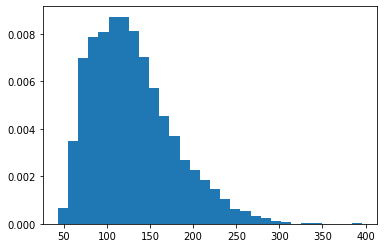

In [62]:
_=plt.hist(df_GM_m_lastWonGm_refined.minutes, density=True, bins = 30)

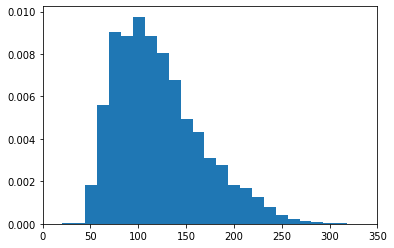

In [63]:
_=plt.hist(df_GM_m_last2ndWonGm.minutes, density=True,bins = 30)
_=plt.xlim([0,350])

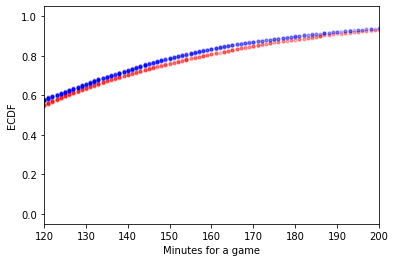

In [64]:
x_s,y_s = ecdf(df_GM_m_last2ndWonGm.minutes)
x_l,y_l = ecdf(df_GM_m_lastWonGm.minutes)
_=plt.plot(x_s, y_s, marker='.',linestyle='none', color='red', alpha=0.03)
_=plt.plot(x_l, y_l, marker='.',linestyle='none', color='blue', alpha=0.03)
_=plt.xlim([120, 200])
_=plt.xlabel('Minutes for a game')
_=plt.ylabel('ECDF')
_=plt.show()

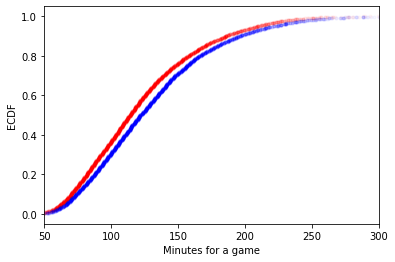

In [65]:
x_s,y_s = ecdf(df_GM_m_last2ndWonGm.minutes)
x_l,y_l = ecdf(df_GM_m_lastWonGm_refined.minutes)
_=plt.plot(x_s, y_s, marker='.',linestyle='none', color='red', alpha=0.03)
_=plt.plot(x_l, y_l, marker='.',linestyle='none', color='blue', alpha=0.03)
_=plt.xlim([50, 300])
_=plt.xlabel('Minutes for a game')
_=plt.ylabel('ECDF')
_=plt.show()

In [66]:
df_GM_m_last2ndWonGm.minutes.count(), df_GM_m_last2ndWonGm.minutes.mean(), df_GM_m_lastWonGm.minutes.count(), df_GM_m_lastWonGm.minutes.mean()

(4723, 121.88248994283295, 7426, 119.1739833019122)

In [67]:
df_GM_m_lastWonGm_refined.minutes.count(), df_GM_m_lastWonGm_refined.minutes.mean()

(4723, 129.72644505610842)

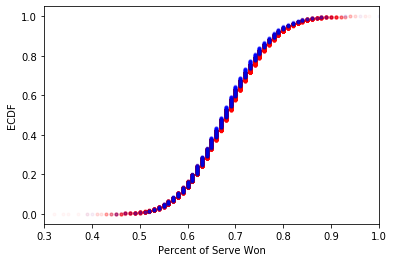

In [68]:
x_r,y_r = ecdf(df[df.winner_hand=='R'].w_svptWon_pct)
x_l,y_l = ecdf(df[df.winner_hand=='L'].w_svptWon_pct)
_=plt.plot(x_r, y_r, marker='.',linestyle='none', color='red', alpha=0.03)
_=plt.plot(x_l, y_l, marker='.',linestyle='none', color='blue', alpha=0.03)
_=plt.xlim([0.3, 1])
_=plt.xlabel('Percent of Serve Won')
_=plt.ylabel('ECDF')
_=plt.show()

In [69]:
df[df.w_svptWon_pct>1]

,tourney_id,tourney_name,surface,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,...,w_GmsLoss,l_ace_pct,l_df_pct,l_1stIn_pct,l_2ndIn_pct,l_1stWon_pct,l_2ndWon_pct,w_svptWon_pct,l_svptWon_pct,round_num
3011,2003-1536,Madrid Masters,Hard,M,20031013,1,101965,Wayne Ferreira,R,185.0,...,12.0,0.14,0.06,0.62,0.38,0.83,0.75,1.34,1.41,2.0
3013,2003-1536,Madrid Masters,Hard,M,20031013,3,102998,Jan Michael Gambill,R,190.0,...,6.0,0.10,0.10,0.57,0.42,0.95,0.85,1.33,1.53,2.0
3014,2003-1536,Madrid Masters,Hard,M,20031013,4,102610,Albert Costa,R,180.0,...,9.0,0.34,0.05,0.71,0.29,0.83,0.54,1.35,1.36,2.0
3015,2003-1536,Madrid Masters,Hard,M,20031013,5,102374,Alex Corretja,R,180.0,...,12.0,0.02,0.02,0.74,0.26,1.33,0.53,1.59,1.74,2.0
3016,2003-1536,Madrid Masters,Hard,M,20031013,6,103888,Mardy Fish,R,188.0,...,9.0,0.07,0.10,0.62,0.38,0.83,0.74,1.31,1.33,2.0
3017,2003-1536,Madrid Masters,Hard,M,20031013,7,103852,Feliciano Lopez,L,188.0,...,11.0,0.06,0.07,0.65,0.35,1.07,0.67,1.28,1.55,2.0
3018,2003-1536,Madrid Masters,Hard,M,20031013,8,103292,Gaston Gaudio,R,175.0,...,13.0,0.04,0.06,0.69,0.31,1.06,0.59,1.38,1.41,2.0
3019,2003-1536,Madrid Masters,Hard,M,20031013,9,103970,David Ferrer,R,175.0,...,14.0,0.04,0.06,0.57,0.43,0.76,0.94,1.65,1.64,2.0
3020,2003-1536,Madrid Masters,Hard,M,20031013,10,102434,Vincent Spadea,R,183.0,...,9.0,0.02,0.22,0.68,0.32,1.10,0.95,1.53,1.65,2.0
3021,2003-1536,Madrid Masters,Hard,M,20031013,11,102035,Jonas Bjorkman,R,183.0,...,15.0,0.22,0.05,0.74,0.26,1.04,0.74,1.35,1.76,2.0


In [70]:
df[df.w_1stIn<df.w_1stWon]

,tourney_id,tourney_name,surface,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,...,w_GmsLoss,l_ace_pct,l_df_pct,l_1stIn_pct,l_2ndIn_pct,l_1stWon_pct,l_2ndWon_pct,w_svptWon_pct,l_svptWon_pct,round_num
3011,2003-1536,Madrid Masters,Hard,M,20031013,1,101965,Wayne Ferreira,R,185.0,...,12.0,0.14,0.06,0.62,0.38,0.83,0.75,1.34,1.41,2.0
3013,2003-1536,Madrid Masters,Hard,M,20031013,3,102998,Jan Michael Gambill,R,190.0,...,6.0,0.10,0.10,0.57,0.42,0.95,0.85,1.33,1.53,2.0
3014,2003-1536,Madrid Masters,Hard,M,20031013,4,102610,Albert Costa,R,180.0,...,9.0,0.34,0.05,0.71,0.29,0.83,0.54,1.35,1.36,2.0
3015,2003-1536,Madrid Masters,Hard,M,20031013,5,102374,Alex Corretja,R,180.0,...,12.0,0.02,0.02,0.74,0.26,1.33,0.53,1.59,1.74,2.0
3016,2003-1536,Madrid Masters,Hard,M,20031013,6,103888,Mardy Fish,R,188.0,...,9.0,0.07,0.10,0.62,0.38,0.83,0.74,1.31,1.33,2.0
3017,2003-1536,Madrid Masters,Hard,M,20031013,7,103852,Feliciano Lopez,L,188.0,...,11.0,0.06,0.07,0.65,0.35,1.07,0.67,1.28,1.55,2.0
3018,2003-1536,Madrid Masters,Hard,M,20031013,8,103292,Gaston Gaudio,R,175.0,...,13.0,0.04,0.06,0.69,0.31,1.06,0.59,1.38,1.41,2.0
3019,2003-1536,Madrid Masters,Hard,M,20031013,9,103970,David Ferrer,R,175.0,...,14.0,0.04,0.06,0.57,0.43,0.76,0.94,1.65,1.64,2.0
3020,2003-1536,Madrid Masters,Hard,M,20031013,10,102434,Vincent Spadea,R,183.0,...,9.0,0.02,0.22,0.68,0.32,1.10,0.95,1.53,1.65,2.0
3021,2003-1536,Madrid Masters,Hard,M,20031013,11,102035,Jonas Bjorkman,R,183.0,...,15.0,0.22,0.05,0.74,0.26,1.04,0.74,1.35,1.76,2.0


In [71]:
df[df.w_svptWon_pct>1].to_csv('data/Exception_pctlargerthan1_1.csv')

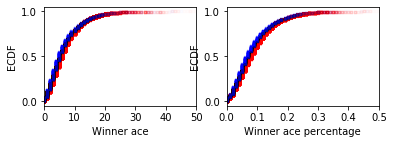

In [72]:
_=plt.subplot(2,2,1)
x_r, y_r = ecdf(df[df.winner_hand=='R'].w_ace)
x_l, y_l = ecdf(df[df.winner_hand=='L'].w_ace)
_=plt.plot(x_r, y_r, marker='.',linestyle='none', color='red', alpha=0.01)
_=plt.plot(x_l, y_l, marker='.',linestyle='none',color='blue', alpha=0.01)
_=plt.xlim([0, 50])
_=plt.xlabel('Winner ace')
_=plt.ylabel('ECDF')
_=plt.subplot(2,2,2)
x_rp, y_rp = ecdf(df[df.winner_hand=='R'].w_ace_pct)
x_lp, y_lp = ecdf(df[df.winner_hand=='L'].w_ace_pct)
_=plt.plot(x_rp, y_rp, marker='.',linestyle='none', color='red', alpha=0.01)
_=plt.plot(x_lp, y_lp, marker='.',linestyle='none',color='blue', alpha=0.01)
_=plt.xlim([0, 0.5])
_=plt.xlabel('Winner ace percentage')
_=plt.ylabel('ECDF')
_=plt.show()

Exam  winner handedness data.  First, select winner columns and drop duplicates.  Then count left and right hand

In [73]:
df.winner_hand.unique()

array(['R', 'L', 'U'], dtype=object)

In [74]:
df_winners = df[['winner_id', 'winner_rank','winner_name', 'winner_hand','winner_ht', 'winner_age','winner_ioc']].drop_duplicates()

In [75]:
df_winners.groupby('winner_hand').winner_name.count()

winner_hand
L     3588
R    24126
U       74
Name: winner_name, dtype: int64

#### Export cleansed data to csv files for Data Story and EAD:

In [76]:
print('export cleansed data to csv files for Data Story and EAD')
df_GM_m_lastWonGm.to_csv('data/df_GM_m_lastWonGm.csv')
df_GM_m_lastWonGm_refined.to_csv('data/df_GM_m_lastWonGm_refined.csv')
df_GM_m_last2ndWonGm.to_csv('data/df_GM_m_last2ndWonGm.csv')
df.to_csv('data/df_main.csv')

export cleansed data to csv files for Data Story and EAD
